In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df_finance = pd.read_excel('zippedData/df_Movie_Financials.xlsx')
df_nofinance = pd.read_excel('zippedData/df_Generes_With_tconst.xlsx')
df_IMDB = pd.read_excel('zippedData/df_IMDB_MovieCatalog.xlsx')
df_RottenTomatoes = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [6]:
# Create new columns, which represent the movie profit and return on investment (ROI)
df_finance['profit'] = df_finance['WW_Gross'] - df_finance['P_Cost']
df_finance['ROI'] = (df_finance['profit']/df_finance['P_Cost'])*100

In [7]:
# Investigate the Data
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540 entries, 0 to 5539
Data columns (total 9 columns):
Unnamed: 0          5540 non-null int64
tconst              5540 non-null object
P_Cost              5540 non-null float64
Dom_Gross           5540 non-null int64
Frgn_Gross          5540 non-null int64
WW_Gross            5540 non-null int64
Domestic Opening    5540 non-null int64
profit              5540 non-null float64
ROI                 5540 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 389.7+ KB


In [9]:
df_nofinance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189509 entries, 0 to 189508
Data columns (total 11 columns):
Unnamed: 0        189509 non-null int64
tconst            189509 non-null object
titleType         189509 non-null object
primaryTitle      189509 non-null object
originalTitle     189509 non-null object
startYear         189509 non-null int64
runtimeMinutes    189509 non-null int64
genres            189509 non-null object
averageRating     189509 non-null float64
numVotes          189509 non-null int64
Splitgeneres      189509 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 15.9+ MB


In [10]:
df_IMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31060 entries, 0 to 31059
Data columns (total 12 columns):
Unnamed: 0        31060 non-null int64
tconst            31060 non-null object
primaryTitle      31060 non-null object
startYear         31060 non-null int64
runtimeMinutes    31060 non-null int64
genres            31060 non-null object
startYear_str     31060 non-null int64
titleyear         31060 non-null object
studio_BOM        4560 non-null object
MPAA              2865 non-null object
rd                4560 non-null datetime64[ns]
StudioDesc        4057 non-null object
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 2.8+ MB


In [11]:
df_RottenTomatoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


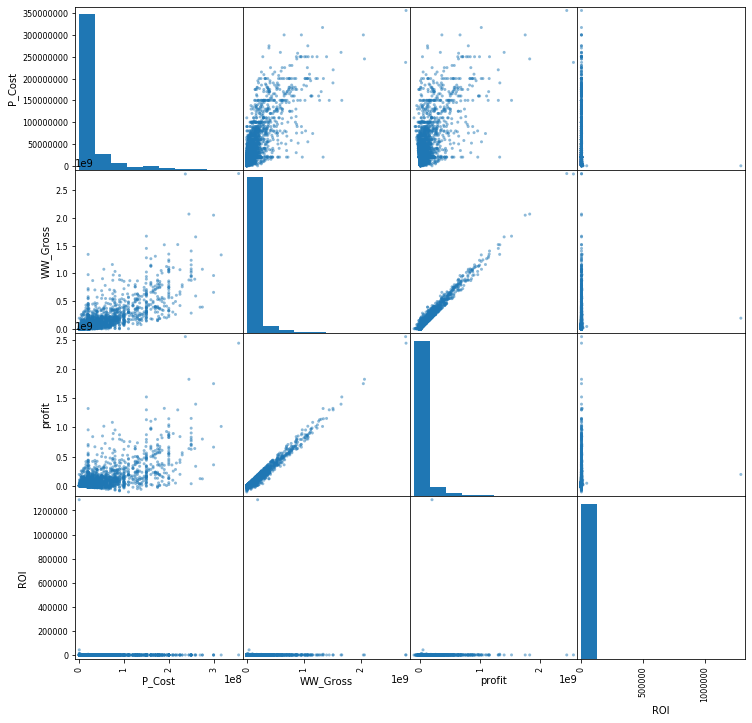

In [14]:
# Investigating Distributions using scatter_matrix
pd.plotting.scatter_matrix(df_finance[['P_Cost', 'WW_Gross', 'profit', 'ROI']], figsize=(12,12));

In [ ]:
# Comments: There is a very strong positive linear relationship between WW_Gross and profit.

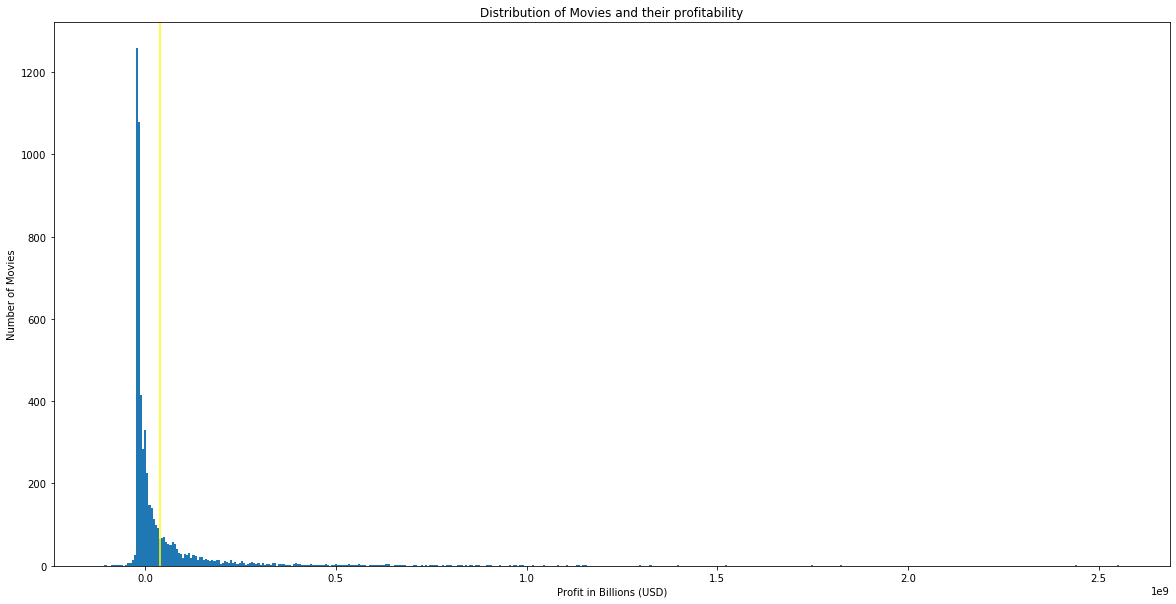

In [20]:
# Create a plot that shows the Distribution of Profit
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(df_finance['profit'], bins='auto')
ax.set_title('Distribution of Movies and their profitability')
ax.set_xlabel('Profit in Billions (USD)')
ax.set_ylabel('Number of Movies')
ax.axvline(df_finance['profit'].mean(), color='yellow');

#add a key containing -> number of movies that are profitable versus not profitable as well as the average profitability

In [17]:
# Comments from above: Looks like there are a large number of 0.0 values.
# I'd like to plot the information for all movies that actually made money.

In [30]:
df_nofinance[['tconst', 'genres', 'Splitgeneres']].head(40)

tconst                    genres Splitgeneres
0   tt0016906            Comedy,Musical       Comedy
1   tt0016906            Comedy,Musical      Musical
2   tt0062336                     Drama        Drama
3   tt0064322            Drama,Thriller        Drama
4   tt0064322            Drama,Thriller     Thriller
5   tt0065392               Documentary  Documentary
6   tt0069049                     Drama        Drama
7   tt0088751      Comedy,Horror,Sci-Fi       Comedy
8   tt0088751      Comedy,Horror,Sci-Fi       Horror
9   tt0088751      Comedy,Horror,Sci-Fi       Sci-Fi
10  tt0100275      Comedy,Drama,Fantasy       Comedy
11  tt0100275      Comedy,Drama,Fantasy        Drama
12  tt0100275      Comedy,Drama,Fantasy      Fantasy
13  tt0110476             Drama,Fantasy        Drama
14  tt0110476             Drama,Fantasy      Fantasy
15  tt0112502           Horror,Thriller       Horror
16  tt0112502           Horror,Thriller     Thriller
17  tt0115686            Comedy,Fantasy       Comedy
18  tt0115686            Comedy,Fantasy      Fantasy
19  tt0116991                     Drama        Drama
20  tt0117743             Drama,Romance        Drama
21  tt0117743             Drama,Romance      Romance
22  tt0118141                     Drama        Drama
23  tt0119231                    Comedy       Comedy
24  tt0119970       Comedy,Drama,Sci-Fi       Comedy
25  tt0119970       Comedy,Drama,Sci-Fi        Drama
26  tt0119970       Comedy,Drama,Sci-Fi       Sci-Fi
27  tt0120589                     Drama        Drama
28  tt0120667  Action,Adventure,Fantasy       Action
29  tt0120667  Action,Adventure,Fantasy    Adventure
30  tt0120667  Action,Adventure,Fantasy      Fantasy
31  tt0121164    Animation,Drama,Family    Animation
32  tt0121164    Animation,Drama,Family        Drama
33  tt0121164    Animation,Drama,Family       Family
34  tt0121766  Action,Adventure,Fantasy       Action
35  tt0121766  Action,Adventure,Fantasy    Adventure
36  tt0121766  Action,Adventure,Fantasy      Fantasy
37  tt0135986      Comedy,Drama,Romance       Comedy
38  tt0135986      Comedy,Drama,Romance        Drama
39  tt0135986      Comedy,Drama,Romance      Romance

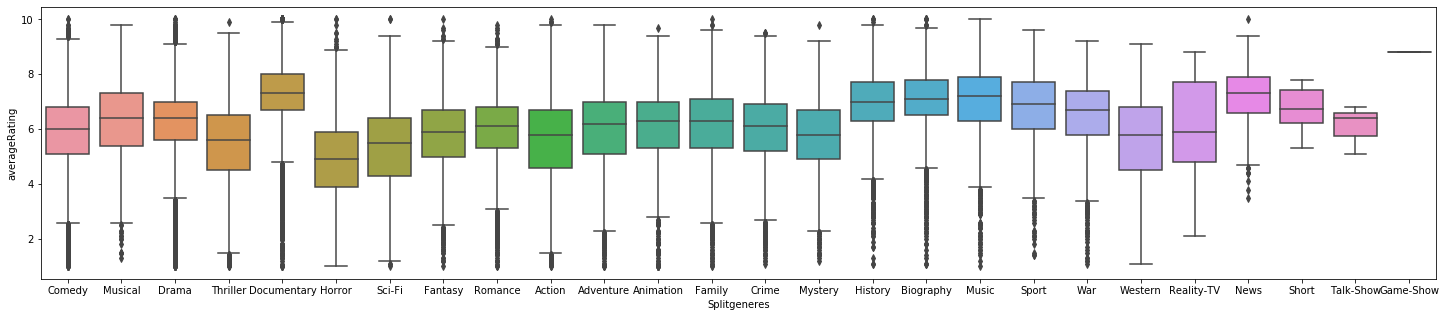

In [40]:
#boxplot of movie rating by genre
plt.figure(figsize=(25,5))
sns.boxplot(x="Splitgeneres", y="averageRating", data=df_nofinance);

In [66]:
df_genres = df_nofinance[['tconst', 'Splitgeneres']].set_index('tconst')
df_ROI = df_finance[['tconst', 'ROI']].set_index('tconst')

In [69]:
df_ROIbyGenre.head(20)

Empty DataFrame
Columns: []
Index: [tt0016906, tt0016906, tt0062336, tt0064322, tt0064322, tt0065392, tt0069049, tt0088751, tt0088751, tt0088751, tt0100275, tt0100275, tt0100275, tt0110476, tt0110476, tt0112502, tt0112502, tt0115686, tt0115686, tt0116991]

In [53]:
df.head(40)

Unnamed: 0     tconst                                    primaryTitle  \
0            0  tt0069049                      The Other Side Of The Wind   
1            1  tt0100275                        The Wandering Soap Opera   
2            2  tt0118141                                     What Is It?   
3            3  tt0119970                                   My Apocalypse   
4            4  tt0120667                                  Fantastic Four   
5            5  tt0121164                                    Corpse Bride   
6            6  tt0121766    Star Wars: Episode Iii - Revenge Of The Sith   
7            7  tt0143558                                   Father'S Acre   
8            8  tt0167011                                  Space Butchers   
9            9  tt0176694                              The Tragedy Of Man   
10          10  tt0197633                          Live Freaky Die Freaky   
11          11  tt0200465                                    The Bank Job   
12          12  tt0206634                                 Children Of Men   
13          13  tt0211933                                           Awake   
14          14  tt0227671                                 Tortilla Heaven   
15          15  tt0228040                                       Ice Queen   
16          16  tt0240200                                           Water   
17          17  tt0244521                                     Funny Money   
18          18  tt0249516                                      Foodfight!   
19          19  tt0257516                                          Cursed   
20          20  tt0259324                                     Ghost Rider   
21          21  tt0259822                                             .45   
22          22  tt0267891                                      The Ringer   
23          23  tt0284363                    I Served The King Of England   
24          24  tt0285175                                           Havoc   
25          25  tt0288569                         Iluminados Por El Fuego   
26          26  tt0292963              Before The Devil Knows You'Re Dead   
27          27  tt0293069                                      Dark Blood   
28          28  tt0293564                                     Rush Hour 3   
29          29  tt0294870                                            Rent   
30          30  tt0301555                            God Grew Tired Of Us   
31          31  tt0304356                               Love Thy Neighbor   
32          32  tt0304876                                       Live Wire   
33          33  tt0308055                                           Bobby   
34          34  tt0312004  Wallace & Gromit: The Curse Of The Were-Rabbit   
35          35  tt0315236                                  The Unpolished   
36          36  tt0317132                           Because Of Winn-Dixie   
37          37  tt0317219                                            Cars   
38          38  tt0317919                         Mission: Impossible Iii   
39          39  tt0318081                              A Sound Of Thunder   

    startYear  runtimeMinutes                      genres  startYear_str  \
0        2018             122                       Drama           2018   
1        2017              80        Comedy,Drama,Fantasy           2017   
2        2005              72                       Drama           2005   
3        2008              82         Comedy,Drama,Sci-Fi           2008   
4        2005             106    Action,Adventure,Fantasy           2005   
5        2005              77      Animation,Drama,Family           2005   
6        2005             140    Action,Adventure,Fantasy           2005   
7        2009              85                       Drama           2009   
8        2005              68        Action,Comedy,Horror           2005   
9        2011             160     Animation,Drama,History           2011   
10       2

In [56]:
df[['tconst', 'studio_IMDB', 'studio_BOM']].head(50)

tconst                                        studio_IMDB studio_BOM
0   tt0069049                                                NaN        NaN
1   tt0100275                                                NaN        NaN
2   tt0118141                                                NaN        NaN
3   tt0119970                                                NaN        NaN
4   tt0120667  Twentieth Century FoxSee full company information        NaN
5   tt0121164           Warner Bros.See full company information        NaN
6   tt0121766  Twentieth Century FoxSee full company information        NaN
7   tt0143558                                                NaN        NaN
8   tt0167011                                                NaN        NaN
9   tt0176694                                                NaN        NaN
10  tt0197633                                                NaN        NaN
11  tt0200465              LionsgateSee full company information        NaN
12  tt0206634     Universal PicturesSee full company information        NaN
13  tt0211933                                      MGM/Weinstein        NaN
14  tt0227671                                                NaN        NaN
15  tt0228040                                                NaN        NaN
16  tt0240200          Mongrel MediaSee full company information        NaN
17  tt0244521                                                NaN        NaN
18  tt0249516                                                NaN        NaN
19  tt0257516        Dimension FilmsSee full company information        NaN
20  tt0259324                                                NaN        NaN
21  tt0259822                                                NaN        NaN
22  tt0267891                                                NaN        NaN
23  tt0284363  Sony Pictures ClassicsSee full company informa...        NaN
24  tt0285175                                                NaN        NaN
25  tt0288569                                                NaN        NaN
26  tt0292963              THINKFilmSee full company information        NaN
27  tt0293069                                                NaN        NaN
28  tt0293564        New Line CinemaSee full company information        NaN
29  tt0294870     Revolution StudiosSee full company information        NaN
30  tt0301555                                                NaN        NaN
31  tt0304356                                                NaN        NaN
32  tt0304876                                                NaN        NaN
33  tt0308055                                      MGM/Weinstein        NaN
34  tt0312004  DreamWorks DistributionSee full company inform...        NaN
35  tt0315236                                                NaN        NaN
36  tt0317132  Twentieth Century FoxSee full company information        NaN
37  tt0317219  Walt Disney Studios Motion PicturesSee full co...        NaN
38  tt0317919     Paramount PicturesSee full company information        NaN
39  tt0318081                                                NaN        NaN
40  tt0318649     Paramount PicturesSee full company information        NaN
41  tt0320661  Twentieth Century FoxSee full company information        NaN
42  tt0323120                                                NaN        NaN
43  tt0326716                                                NaN        NaN
44  tt0326905                MiramaxSee full company information        NaN
45  tt0327084             DreamWorksSee full company information        NaN
46  tt0327597         Focus FeaturesSee full company information        NaN
47  tt0327643                                                NaN        NaN
48  tt0329539                                                NaN        NaN
49  tt0329774                                                NaN        NaN

In [79]:
df.studio_IMDB.head()

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4    Twentieth Century FoxSee full company information
Name: studio_IMDB, dtype: object

In [26]:
# 'tconst' , df_finance['ROI'] , df_IMDB['studio_BOM'] , df_nofinance['Splitgeneres'],
# and maybe df_nofinance['primaryTitle'] just so we know what movie we are talking about

#CREATING 3 COLUMNS OF INTEREST WITH THE COMMON KEY AS TCONST
df_ROI = df_finance.drop(['Unnamed: 0', 'P_Cost', 'Dom_Gross', 'Frgn_Gross', 'WW_Gross', 'Domestic Opening',
                          'profit'], axis=1)
df_studio = df_IMDB.drop(['Unnamed: 0', 'primaryTitle', 'startYear', 'runtimeMinutes', 'genres',
                          'startYear_str', 'titleyear', 'MPAA', 'rd', 'StudioDesc'], axis=1)
df_genre = df_nofinance.drop(['Unnamed: 0', 'titleType', 'originalTitle', 'startYear', 'runtimeMinutes',
                              'genres', 'averageRating', 'numVotes'], axis=1)

In [72]:
df1 = pd.merge(df_ROI, df_studio)
df2 = pd.merge(df1, df_genre)
df2.set_index('tconst', inplace=True)
df2
#df2 now just needs the studio_BOM 0 values removed

ROI studio_BOM        primaryTitle Splitgeneres
tconst                                                           
tt0120667  233.535934          0      Fantastic Four       Action
tt0120667  233.535934          0      Fantastic Four    Adventure
tt0120667  233.535934          0      Fantastic Four      Fantasy
tt0121164  293.636120          0        Corpse Bride    Animation
tt0121164  293.636120          0        Corpse Bride        Drama
...               ...        ...                 ...          ...
tt7607940  -99.478212       Eros     Namaste England      Romance
tt8427036  -99.638762       Eros     Helicopter Eela        Drama
tt7870578  -99.813862      WGUSA  Girls vs Gangsters       Comedy
tt7870578  -99.813862      WGUSA  Girls vs Gangsters        Drama
tt8705434  -99.889120     Strand        The Workshop        Drama

[11311 rows x 4 columns]

In [145]:
#REMOVING '0' VALUES FOR studio_BOM
df3 = df2[df2.studio_BOM != '0']
df3

ROI studio_BOM                    primaryTitle Splitgeneres
tconst                                                                       
tt1399103  476.304656       P/DW  Transformers: Dark of the Moon       Action
tt1399103  476.304656       P/DW  Transformers: Dark of the Moon    Adventure
tt1399103  476.304656       P/DW  Transformers: Dark of the Moon       Sci-Fi
tt0337692  -51.747759        IFC                     On the Road    Adventure
tt0337692  -51.747759        IFC                     On the Road        Drama
...               ...        ...                             ...          ...
tt7607940  -99.478212       Eros                 Namaste England      Romance
tt8427036  -99.638762       Eros                 Helicopter Eela        Drama
tt7870578  -99.813862      WGUSA              Girls vs Gangsters       Comedy
tt7870578  -99.813862      WGUSA              Girls vs Gangsters        Drama
tt8705434  -99.889120     Strand                    The Workshop        Drama

[4193 rows x 4 columns]

In [141]:
df3.groupby(['studio_BOM', 'Splitgeneres']).mean().sort_values(by='ROI', ascending=False).head(100) #ROI sorted by studio and genre

ROI
studio_BOM Splitgeneres             
WB (NL)    Mystery       6944.652765
           Thriller      6635.465991
           Horror        5775.707393
HC         Drama         2791.446641
           Action        2791.446641
...                              ...
Uni.       Biography      236.080162
Focus      Romance        236.004062
Fox        Comedy         235.629229
Par.       Thriller       235.014397
Sony       Sci-Fi         234.686112

[200 rows x 1 columns]

In [138]:
df3.groupby(['studio_BOM']).mean().sort_values(by='ROI', ascending=False) #ROI sorted by studio
df3.groupby(['studio_BOM']).mean().sort_values(by='ROI', ascending=False).head(20) #ROI sorted by studio

ROI
studio_BOM             
HC          2791.446641
WB (NL)     1897.064804
ParV        1440.963600
GrtIndia     747.194633
BH Tilt      596.409122
Wein.        504.403895
Uni.         488.543919
Par.         440.468864
Affirm       418.319320
ENTMP        413.851494
WAMCR        395.572741
TriS         372.115075
SGem         296.704698
LGF          295.722474
LG/S         287.249884
WGUSA        285.394596
Fox          263.307771
P/DW         261.796381
WB           261.245713
FoxS         258.291315

In [122]:
df3.groupby(['Splitgeneres']).mean().sort_values(by='ROI', ascending=False) #ROI sorted by genre

ROI
Splitgeneres             
Horror        1099.065496
Mystery        918.220372
Thriller       492.214778
Sci-Fi         274.797482
Animation      272.453786
Adventure      261.728619
Fantasy        229.749700
Family         221.445405
Music          212.322683
Comedy         199.151322
Action         179.216786
Biography      175.367676
Drama          164.798363
Romance        156.204234
History        123.421795
Crime          111.039044
Western         82.205385
Musical         65.440359
Sport           60.380273
War             20.678523
Documentary     -9.600322

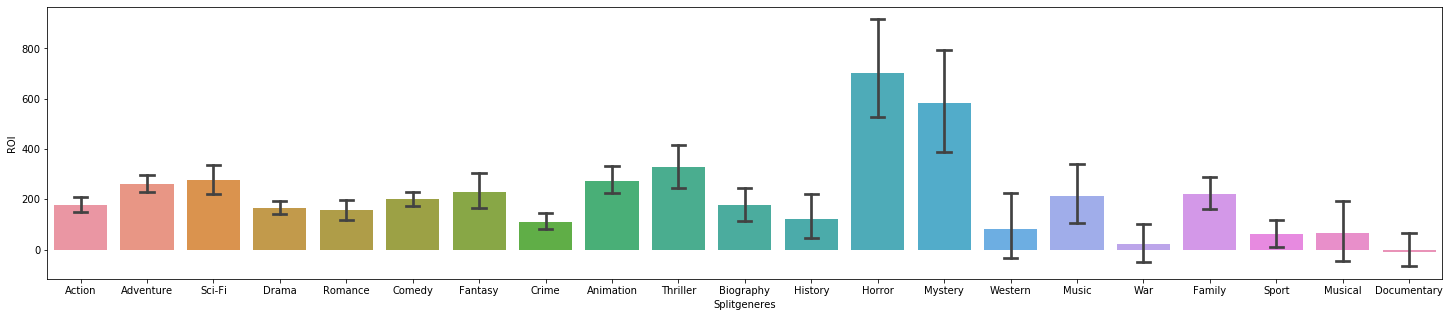

In [120]:
#barplot of ROI by genre
plt.figure(figsize=(25,5))
sns.barplot(x="Splitgeneres", y="ROI", data=df4, capsize=.2);

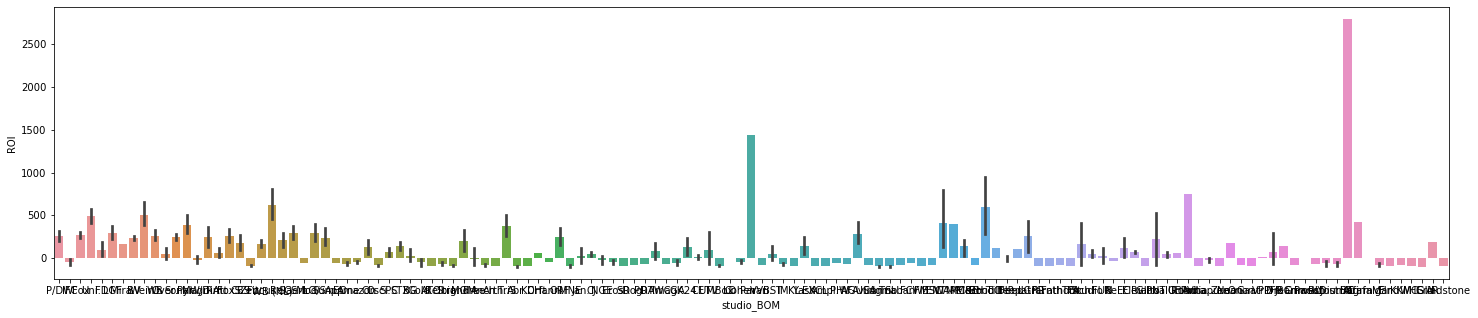

In [117]:
#barplot of ROI by studio
plt.figure(figsize=(25,5))
sns.barplot(x="studio_BOM", y="ROI", data=df4, capsize=.2);

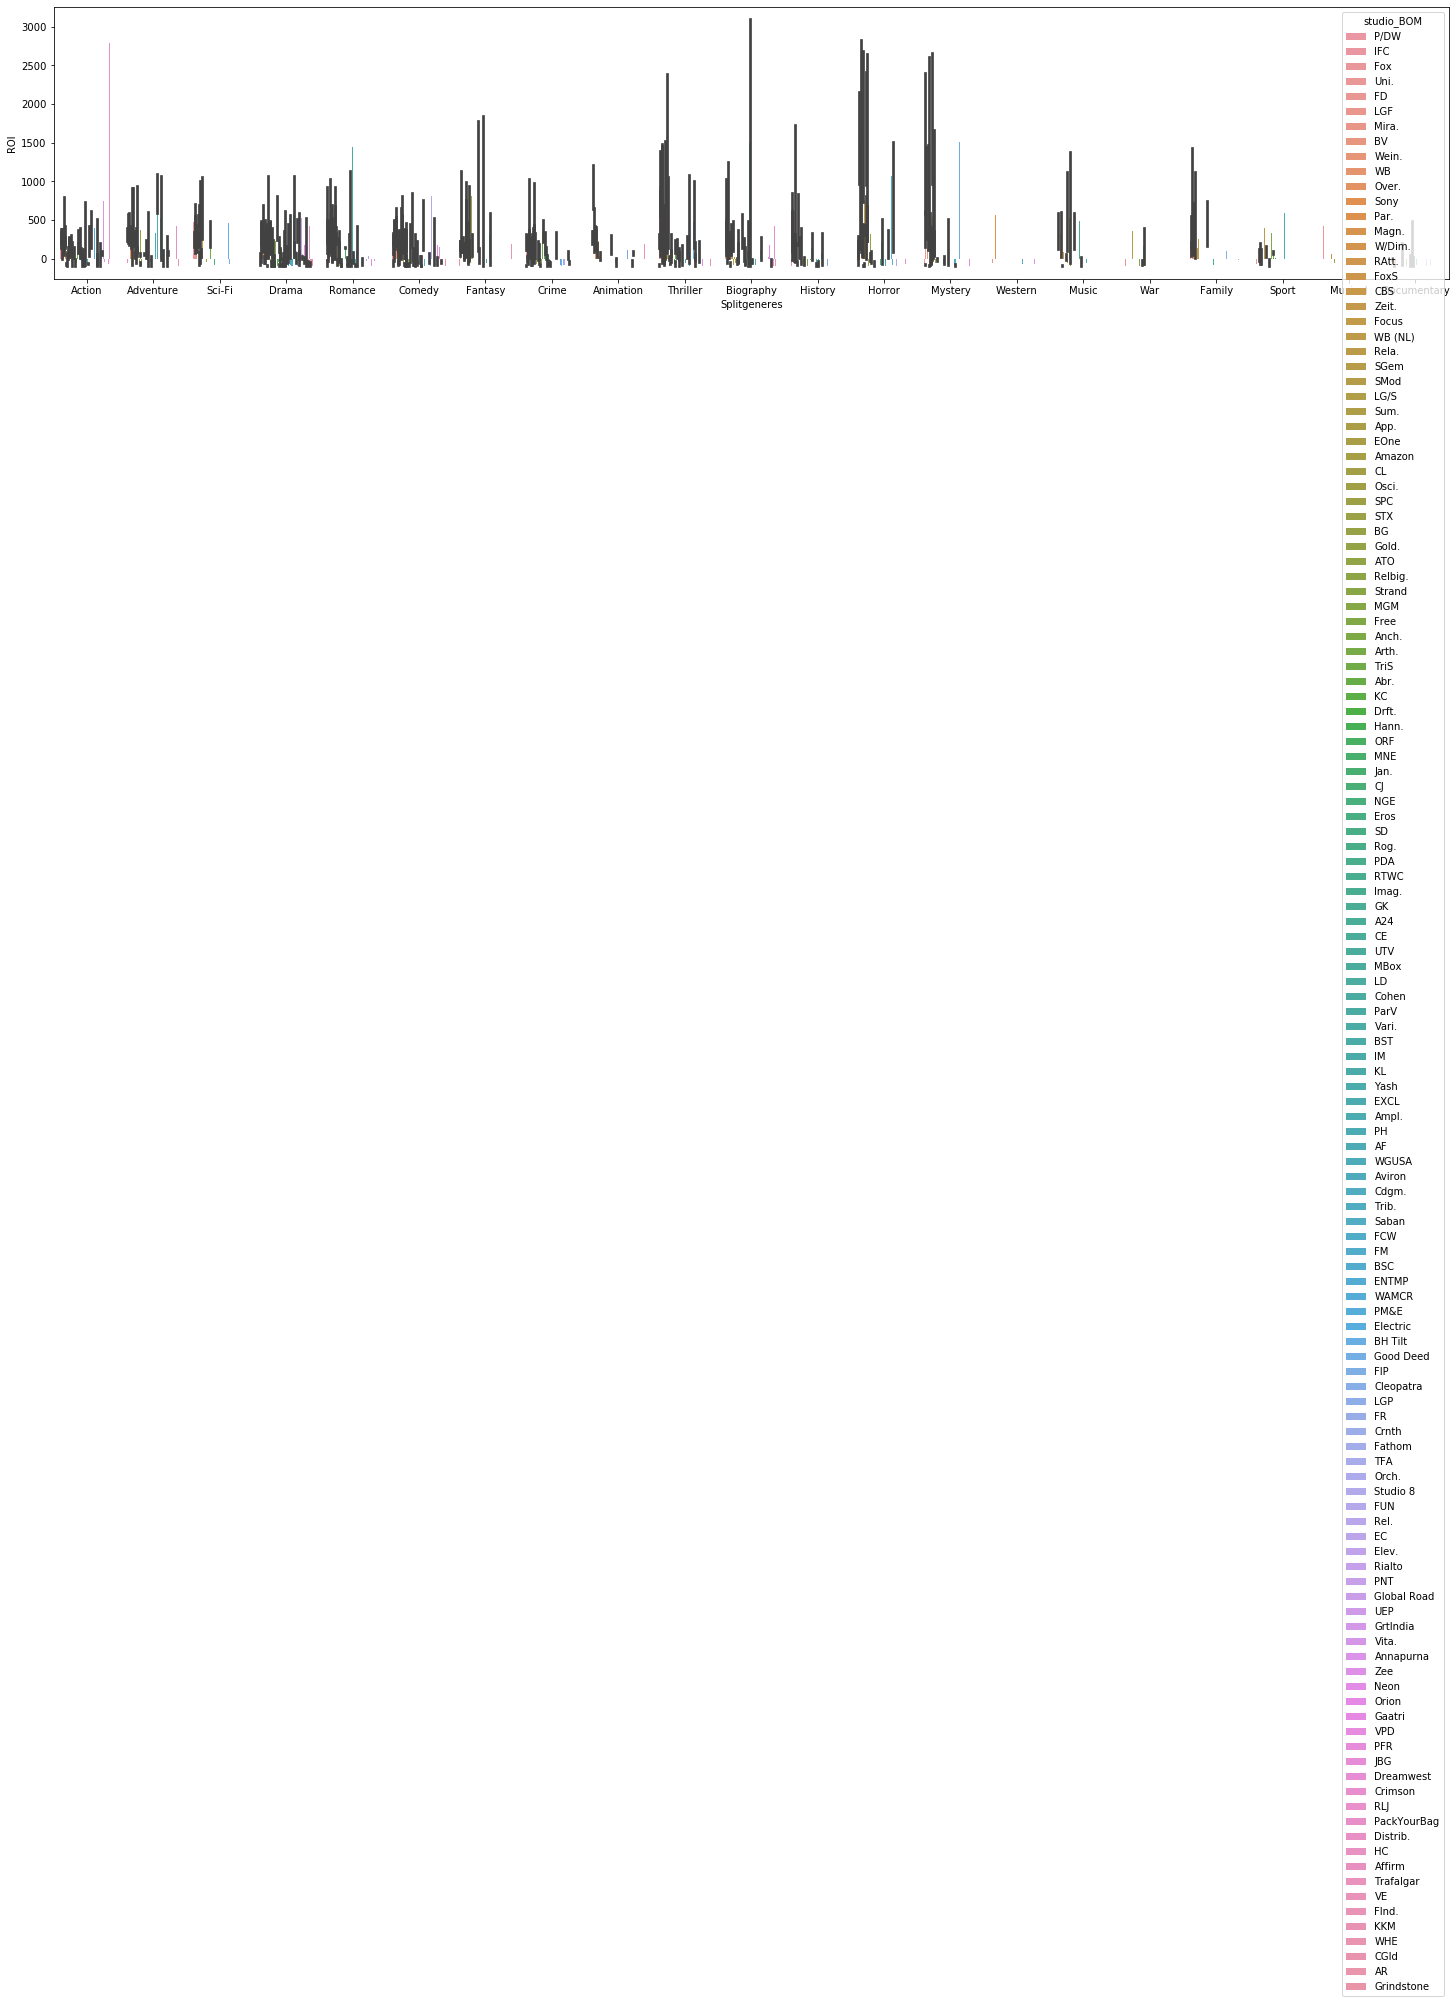

In [124]:
#barplot of ROI by studio
plt.figure(figsize=(25,5))
sns.barplot(x="Splitgeneres", y="ROI", hue="studio_BOM", data=df4);

In [142]:
list(df3.studio_BOM.unique())

['P/DW',
 'IFC',
 'Fox',
 'Uni.',
 'FD',
 'LGF',
 'Mira.',
 'BV',
 'Wein.',
 'WB',
 'Over.',
 'Sony',
 'Par.',
 'Magn.',
 'W/Dim.',
 'RAtt.',
 'FoxS',
 'CBS',
 'Zeit.',
 'Focus',
 'WB (NL)',
 'Rela.',
 'SGem',
 'SMod',
 'LG/S',
 'Sum.',
 'App.',
 'EOne',
 'Amazon',
 'CL',
 'Osci.',
 'SPC',
 'STX',
 'BG',
 'Gold.',
 'ATO',
 'Relbig.',
 'Strand',
 'MGM',
 'Free',
 'Anch.',
 'Arth.',
 'TriS',
 'Abr.',
 'KC',
 'Drft.',
 'Hann.',
 'ORF',
 'MNE',
 'Jan.',
 'CJ',
 'NGE',
 'Eros',
 'SD',
 'Rog.',
 'PDA',
 'RTWC',
 'Imag.',
 'GK',
 'A24',
 'CE',
 'UTV',
 'MBox',
 'LD',
 'Cohen',
 'ParV',
 'Vari.',
 'BST',
 'IM',
 'KL',
 'Yash',
 'EXCL',
 'Ampl.',
 'PH',
 'AF',
 'WGUSA',
 'Aviron',
 'Cdgm.',
 'Trib.',
 'Saban',
 'FCW',
 'FM',
 'BSC',
 'ENTMP',
 'WAMCR',
 'PM&E',
 'Electric',
 'BH Tilt',
 'Good Deed',
 'FIP',
 'Cleopatra',
 'LGP',
 'FR',
 'Crnth',
 'Fathom',
 'TFA',
 'Orch.',
 'Studio 8',
 'FUN',
 'Rel.',
 'EC',
 'Elev.',
 'Rialto',
 'PNT',
 'Global Road',
 'UEP',
 'GrtIndia',
 'Vita.',
 'Annapur

In [153]:
#Need to isolate the "top" studios (studios with top 20 ROIs)
df4 = df3[df3.studio_BOM != 'IFC']
df5 = df4[df4.studio_BOM != 'FD']
df6 = df5[df5.studio_BOM != 'Mira.']
df7 = df6[df6.studio_BOM != 'BV']
df8 = df7[df7.studio_BOM != 'Over.']
df9 = df8[df8.studio_BOM != 'Sony']
df10 = df9[df9.studio_BOM != 'Magn.']
df11 = df10[df10.studio_BOM != 'W/Dim.']
df12 = df11[df11.studio_BOM != 'RAtt.']
df13 = df12[df12.studio_BOM != 'CBS']
df14 = df13[df13.studio_BOM != 'Zeit.']
df15 = df14[df14.studio_BOM != 'Focus']
df16 = df15[df15.studio_BOM != 'Rela.']
df17 = df16[df16.studio_BOM != 'SMod']
df18 = df17[df17.studio_BOM != 'Sum.']
df19 = df18[df18.studio_BOM != 'App.']
df20 = df19[df19.studio_BOM != 'EOne']
df21 = df20[df20.studio_BOM != 'Amazon']
df22 = df21[df21.studio_BOM != 'CL']
df23 = df22[df22.studio_BOM != 'Osci.']
df24 = df23[df23.studio_BOM != 'SPC']
df25 = df24[df24.studio_BOM != 'STX']
df26 = df25[df25.studio_BOM != 'BG']
df27 = df26[df26.studio_BOM != 'Gold.']
df28 = df27[df27.studio_BOM != 'ATO']
df29 = df28[df28.studio_BOM != 'Relbig.']
df30 = df29[df29.studio_BOM != 'Strand']
df31 = df30[df30.studio_BOM != 'MGM']
df32 = df31[df31.studio_BOM != 'Free']
df33 = df32[df32.studio_BOM != 'Anch.']
df34 = df33[df33.studio_BOM != 'Arth.']
df35 = df34[df34.studio_BOM != 'Abr.']
df36 = df35[df35.studio_BOM != 'KC']
df37 = df36[df36.studio_BOM != 'Drft.']
df38 = df37[df37.studio_BOM != 'Hann.']
df39 = df38[df38.studio_BOM != 'ORF']
df40 = df39[df39.studio_BOM != 'MNE']
df41 = df40[df40.studio_BOM != 'Jan.']
df42 = df41[df41.studio_BOM != 'CJ']
df43 = df42[df42.studio_BOM != 'NGE']
df44 = df43[df43.studio_BOM != 'Eros']
df45 = df44[df44.studio_BOM != 'SD']
df46 = df45[df45.studio_BOM != 'Rog.']
df47 = df46[df46.studio_BOM != 'PDA']
df48 = df47[df47.studio_BOM != 'RTWC']
df49 = df48[df48.studio_BOM != 'Imag.']
df50 = df49[df49.studio_BOM != 'GK']
df51 = df50[df50.studio_BOM != 'A24']
df52 = df51[df51.studio_BOM != 'CE']
df53 = df52[df52.studio_BOM != 'UTV']
df54 = df53[df53.studio_BOM != 'MBox']
df55 = df54[df54.studio_BOM != 'LD']
df56 = df55[df55.studio_BOM != 'Cohen']
df57 = df56[df56.studio_BOM != 'Vari.']
df58 = df57[df57.studio_BOM != 'BST']
df59 = df58[df58.studio_BOM != 'IM']
df60 = df59[df59.studio_BOM != 'KL']
df61 = df60[df60.studio_BOM != 'Yash']
df62 = df61[df61.studio_BOM != 'EXCL']
df63 = df62[df62.studio_BOM != 'Ampl.']
df64 = df63[df63.studio_BOM != 'PH']
df65 = df64[df64.studio_BOM != 'AF']
df66 = df65[df65.studio_BOM != 'Aviron']
df67 = df66[df66.studio_BOM != 'Cdgm.']
df68 = df67[df67.studio_BOM != 'Trib.']
df69 = df68[df68.studio_BOM != 'Saban']
df70 = df69[df69.studio_BOM != 'FCW']
df71 = df70[df70.studio_BOM != 'FM']
df72 = df71[df71.studio_BOM != 'BSC']
df73 = df72[df72.studio_BOM != 'PM&E']
df74 = df73[df73.studio_BOM != 'Electric']
df75 = df74[df74.studio_BOM != 'Good Deed']
df76 = df75[df75.studio_BOM != 'FIP']
df77 = df76[df76.studio_BOM != 'Cleopatra']
df78 = df77[df77.studio_BOM != 'LGP']
df79 = df78[df78.studio_BOM != 'FR']
df80 = df79[df79.studio_BOM != 'Crnth']
df81 = df80[df80.studio_BOM != 'Fathom']
df82 = df81[df81.studio_BOM != 'TFA']
df83 = df82[df82.studio_BOM != 'Orch.']
df84 = df83[df83.studio_BOM != 'Studio 8']
df85 = df84[df84.studio_BOM != 'FUN']
df86 = df85[df85.studio_BOM != 'Rel.']
df87 = df86[df86.studio_BOM != 'EC']
df88 = df87[df87.studio_BOM != 'Elev.']
df89 = df88[df88.studio_BOM != 'Rialto']
df90 = df89[df89.studio_BOM != 'PNT']
df91 = df90[df90.studio_BOM != 'Global Road']
df92 = df91[df91.studio_BOM != 'UEP']
df93 = df92[df92.studio_BOM != 'Vita.']
df94 = df93[df93.studio_BOM != 'Annapurna']
df95 = df94[df94.studio_BOM != 'Zee']
df96 = df95[df95.studio_BOM != 'Neon']
df97 = df96[df96.studio_BOM != 'Orion']
df98 = df97[df97.studio_BOM != 'Gaatri']
df99 = df98[df98.studio_BOM != 'VPD']
df100 = df99[df99.studio_BOM != 'PFR']
df101 = df100[df100.studio_BOM != 'JBG']
df102 = df101[df101.studio_BOM != 'Dreamwest']
df103 = df102[df102.studio_BOM != 'Crimson']
df104 = df103[df103.studio_BOM != 'RLJ']
df105 = df104[df104.studio_BOM != 'PackYourBag']
df106 = df105[df105.studio_BOM != 'Distrib.']
df107 = df106[df106.studio_BOM != 'Trafalgar']
df108 = df107[df107.studio_BOM != 'VE']
df109 = df108[df108.studio_BOM != 'FInd.']
df110 = df109[df109.studio_BOM != 'KKM']
df111 = df110[df110.studio_BOM != 'WHE']
df112 = df111[df111.studio_BOM != 'CGld']
df113 = df112[df112.studio_BOM != 'AR']
df114 = df113[df113.studio_BOM != 'Grindstone']

df_top20studio = df114

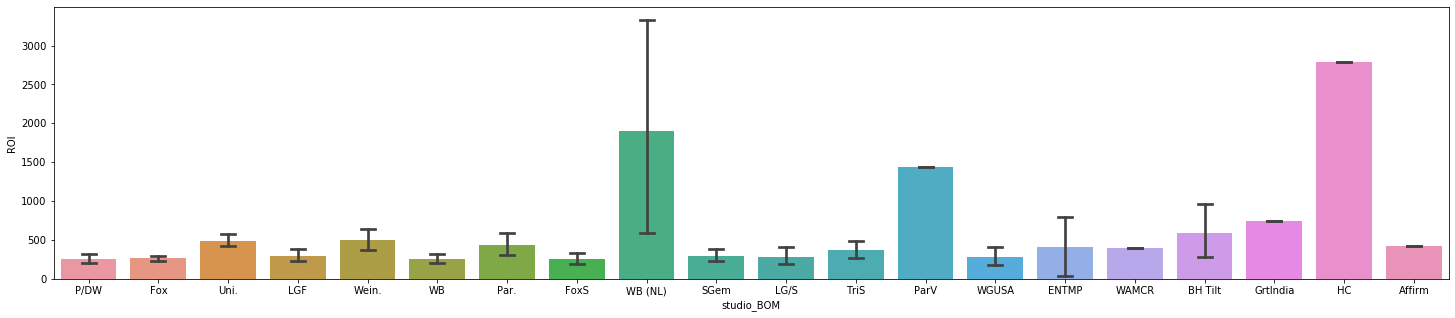

In [154]:
#barplot of ROI by top 20 studio
plt.figure(figsize=(25,5))
sns.barplot(x="studio_BOM", y="ROI", data=df_top20studio, capsize=.2);

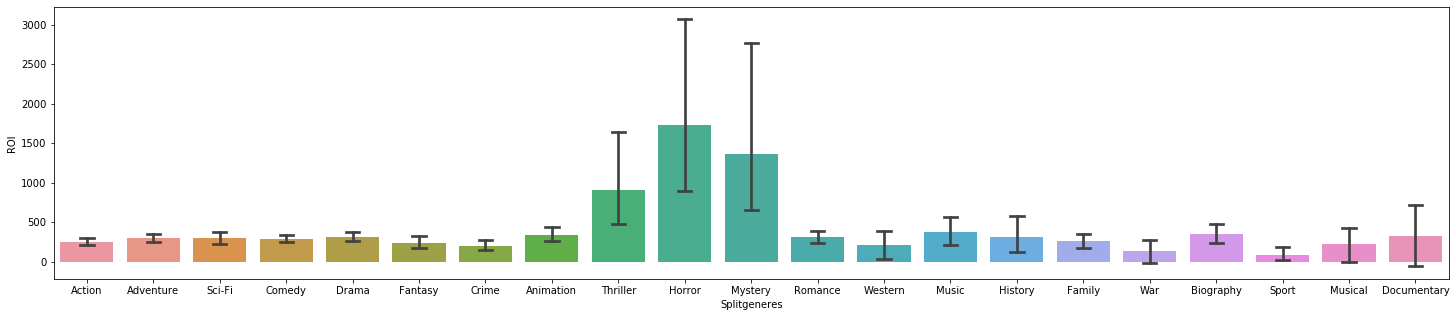

In [160]:
#barplot of ROI by genre
plt.figure(figsize=(25,5))
sns.barplot(x="Splitgeneres", y="ROI", data=df_top20studio, capsize=.2);

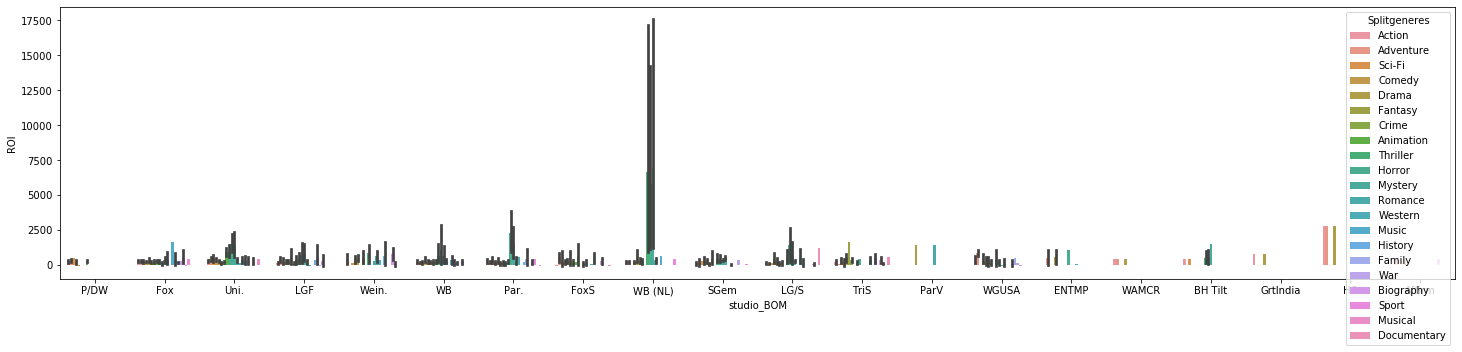

In [157]:
#barplot of ROI by studio by genre
plt.figure(figsize=(25,5))
sns.barplot(x="studio_BOM", y="ROI", hue="Splitgeneres", data=df_top20studio);